In [7]:
import numpy as np
import timor
import argparse
import pygad
import os
from util import *
from timor.Module import *
from timor.utilities.visualization import animation
# import matplotlib.pyplot as plt
# import itertools
# from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
from timor import ModuleAssembly, ModulesDB
from timor.Bodies import Body, Connector, Gender
from timor.configuration_search.GA import GA
from timor.utilities.visualization import MeshcatVisualizer, clear_visualizer
from timor.utilities.dtypes import Lexicographic
from timor.utilities.transformation import Transformation
from timor.utilities.spatial import rotX, rotY, rotZ
from timor.Module import AtomicModule, ModulesDB, ModuleHeader
from timor.Joints import Joint
from timor.Geometry import Box, ComposedGeometry, Cylinder, Sphere, Mesh

from timor_ga import *
from reachability import Reachability
from generate_module import create_i_links, create_eef, create_revolute_joint, base

In [8]:
how_many_times_to_split_angle_range = 30
world_resolution = 0.01
world_dimension = [1.00, 1.00, 1.00]
num_threads = 5
our_hyperparameters = {
    'population_size': 30,
    'num_generations': 100,
    'num_genes': 9,
    'save_solutions_dir': None
}

In [9]:
#r_4310_base = create_revolute_joint("assets/Assem_4310_BASE/Assem_4310_BASE/urdf/Assem_4310_BASE.urdf")
r_4310_base = base("assets/Assem_4310_BASE/Assem_4310_BASE/urdf/Assem_4310_BASE.urdf")
r_4305_joint = create_revolute_joint("assets/Assem_4305_JOINT/Assem_4305_JOINT/urdf/Assem_4305_JOINT.urdf")
r_4310_joint = create_revolute_joint("assets/Assem_4310_JOINT/Assem_4310_JOINT/urdf/Assem_4310_JOINT.urdf")
#r_430_joint = create_revolute_joint("assets/430_joint/430_joint/urdf/430_joint.urdf")
#r_330_joint = create_revolute_joint("assets/330_joint/330_joint/urdf/330_joint.urdf")
#r_550_joint = create_revolute_joint("assets/540_joint/540_joint/urdf/540_joint.urdf")
# Links

baseto4310_links = create_i_links(rod_name="baseto4310")
r4310to4305_links = create_i_links(rod_name="r4310to4305")
r4310to4310_links = create_i_links(rod_name="r4310to4310")

eef = create_eef()

# Create database
db = ModulesDB()
db.add(r_4310_base)
db.add(r_4310_joint)
#db.add(r_4305_joint)
#db.add(r_330_joint)
#db.add(r_430_joint)
#db.add(r_550_joint)
db = db.union(baseto4310_links)
#db = db.union(r4310to4305_links)
db = db.union(r4310to4310_links)

db = db.union(eef)
viz = db.debug_visualization()

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7008/static/


In [10]:
#modules = ('base_rev_joint','baseto4310-0.3','motor4310_rev_joint', 'r4310to4310-0.3', 'motor4310_rev_joint', 'r4310to4305-0.15', 'motor4305_rev_joint', 'eef')
#modules = ('base_rev_joint', 'baseto4310-0.45', 'motor4305_rev_joint', 'r4310to4305-0.45', 'motor4305_rev_joint', 'eef')
#modules = ('base_rev_joint', 'baseto4310-0.45', 'motor4305_rev_joint', 'r4310to4305-0.3', 'motor4310_rev_joint', 'r4310to4305-0.15', 'r4310to4310-0.15', 'motor4310_rev_joint', 'eef')
#modules = ('base_rev_joint', 'baseto4310-0.3', 'r4310to4310-0.15', 'baseto4310-0.3', 'motor4305_rev_joint', 'r4310to4305-0.15', 'motor4310_rev_joint', 'r4310to4305-0.3', 'baseto4310-0.3', 'motor4305_rev_joint', 'r4310to4310-0.15', 'baseto4310-0.15', 'motor4305_rev_joint', 'r4310to4305-0.15', 'r4310to4310-0.45', 'r4310to4305-0.15', 'motor4310_rev_joint', 'r4310to4305-0.15', 'eef')
#modules = ('base_rev_joint', 'baseto4310-0.15', 'motor4310_rev_joint', 'r4310to4310-0.45', 'motor4310_rev_joint', 'r4310to4310-0.3', 'motor4310_rev_joint', 'r4310to4310-0.15', 'baseto4310-0.45', 'r4310to4310-0.15', 'baseto4310-0.3', 'motor4310_rev_joint', 'r4310to4310-0.15', 'baseto4310-0.15', 'r4310to4310-0.15', 'eef')
modules = ('base_rev_joint', 'baseto4310-0.15', 'motor4310_rev_joint', 'r4310to4310-0.3', 'motor4310_rev_joint', 'r4310to4310-0.15', 'motor4310_rev_joint', 'r4310to4310-0.45', 'motor4310_rev_joint', 'r4310to4310-0.15', 'motor4310_rev_joint', 'r4310to4310-0.3', 'motor4310_rev_joint', 'eef')
B = ModuleAssembly.from_serial_modules(db, modules)
print(num_incorrect_connections(B))
print(B.original_module_ids)
#print(B.nJoints)
robot = B.to_pin_robot()
print(robot.has_self_collision())
print(robot.data)
print(robot.joints)
viz = robot.visualize()


0
('base_rev_joint', 'baseto4310-0.15', 'motor4310_rev_joint', 'r4310to4310-0.3', 'motor4310_rev_joint', 'r4310to4310-0.15', 'motor4310_rev_joint', 'r4310to4310-0.45', 'motor4310_rev_joint', 'r4310to4310-0.15', 'motor4310_rev_joint', 'r4310to4310-0.3', 'motor4310_rev_joint', 'eef')


False
['base_rev_joint.base_rev_joint', 'motor4310_rev_joint.motor4310_rev_joint', 'motor4310_rev_joint-1.motor4310_rev_joint', 'motor4310_rev_joint-2.motor4310_rev_joint', 'motor4310_rev_joint-3.motor4310_rev_joint', 'motor4310_rev_joint-4.motor4310_rev_joint', 'motor4310_rev_joint-5.motor4310_rev_joint']
You can open the visualizer by visiting the following URL:
http://127.0.0.1:7009/static/


In [11]:
modules = ('base_rev_joint', 'baseto4310-0.15', 'motor4310_rev_joint', 
           'r4310to4310-0.15', 'motor4310_rev_joint', 'r4310to4310-0.15', 
           'motor4310_rev_joint', 'r4310to4310-0.15', 'motor4310_rev_joint', 'r4310to4305-0.15', 'motor4305_rev_joint', 'eef')
#modules = ('base_rev_joint', 'baseto4310-0.3', 'motor4310_rev_joint', 'r4310to4310-0.3', 'motor4310_rev_joint', 'r4310to4305-0.3', 'motor4305_rev_joint', 'eef')
#modules = ('base_rev_joint', 'baseto4310-0.15', 'motor4310_rev_joint', 'r4310to4310-0.45', 'motor4310_rev_joint', 'r4310to4310-0.3', 'motor4310_rev_joint', 'r4310to4310-0.15', 'baseto4310-0.45', 'r4310to4310-0.15', 'baseto4310-0.3', 'motor4310_rev_joint', 'r4310to4310-0.15', 'baseto4310-0.15', 'r4310to4310-0.15', 'eef')
modules = ('base_rev_joint', 'baseto4310-0.15', 'motor4310_rev_joint', 'r4310to4310-0.45', 'motor4310_rev_joint', 'r4310to4310-0.15', 'motor4310_rev_joint', 'r4310to4310-0.3', 'motor4310_rev_joint', 'r4310to4310-0.15', 'motor4310_rev_joint', 'r4310to4310-0.15', 'eef')
B = ModuleAssembly.from_serial_modules(db, modules)
print(num_incorrect_connections(B))
robot = B.to_pin_robot()

B.to_urdf(write_to=Path("robot6DOF.urdf"))
print("DOF of the robot:", robot.dof)

# for frame in robot.model.frames:
#     print(frame.name)
print(robot.parents.keys())
print(robot.joints)
viz = robot.visualize()


0
DOF of the robot: 6
dict_keys(['base_rev_joint.base_rev_joint', 'motor4310_rev_joint.motor4310_rev_joint', 'motor4310_rev_joint-1.motor4310_rev_joint', 'motor4310_rev_joint-2.motor4310_rev_joint', 'motor4310_rev_joint-3.motor4310_rev_joint', 'motor4310_rev_joint-4.motor4310_rev_joint'])
['base_rev_joint.base_rev_joint', 'motor4310_rev_joint.motor4310_rev_joint', 'motor4310_rev_joint-1.motor4310_rev_joint', 'motor4310_rev_joint-2.motor4310_rev_joint', 'motor4310_rev_joint-3.motor4310_rev_joint', 'motor4310_rev_joint-4.motor4310_rev_joint']
You can open the visualizer by visiting the following URL:
http://127.0.0.1:7010/static/


In [12]:
from timor.utilities.visualization import animation
q0 = np.zeros((robot.dof,))
print(robot.dof)
q1 = robot.random_configuration()
q2 = np.array([np.pi, -np.pi/2, np.pi/2, np.pi/2])
print(q1)
robot.update_configuration(q1)
print(robot.has_self_collision())
viz = robot.visualize()
#print(q1)

# trajectory = np.linspace(q0, q1)
# print(trajectory)
# animation(robot, trajectory, dt=.1)

6
[ 1.77849758 -0.37784363 -0.06354715 -0.19795278 -0.56694232  2.06226493]
False
You can open the visualizer by visiting the following URL:
http://127.0.0.1:7011/static/


In [13]:
from reachability import Reachability
from timor_ga import *

# modules = ('base_rev_joint', 'baseto4310-0.15', 'motor4310_rev_joint', 
#            'r4310to4310-0.15', 'motor4310_rev_joint', 'r4310to4310-0.15', 
#            'motor4310_rev_joint', 'eef')
# modules = ('base_rev_joint', 'baseto4310-0.15', 'motor4310_rev_joint', 
#            'r4310to4310-0.15', 'motor4310_rev_joint', 'r4310to4310-0.15', 
#            'motor4310_rev_joint', 'r4310to4305-0.15', 'motor4310_rev_joint', 'r4310to4305-0.15', 'motor4305_rev_joint')
# C = ModuleAssembly.from_serial_modules(db, modules)

# robot = C.to_pin_robot()

how_many_times_to_split_angle_range = 30
world_resolution = 0.01
world_dimension = [1.00, 1.00, 1.00]
num_threads = 5

reach = Reachability(robot)
reach.reachability_random_sample(num_samples = 100000)
valid_poses = reach.reachability_random_sample(num_samples = 100000)
print("Valid poses:" , valid_poses)
reachable, manipulability =  zip(*valid_poses)
reachable = np.array([list(pt) for pt in reachable])
reachability_score = reach.find_reachibility_percentage(valid_pose=reachable)
print(reachability_score)


Valid poses: [((0.25, 0.08, 0.55), 0.0055311828785200145), ((-0.31, -0.23, -0.1), 0.012191216413517983), ((-0.39, -0.17, 1.05), 0.0002562295185870765), ((0.7, 0.14, 0.47), 0.11205653047814779), ((-0.04, -0.29, 0.41), 0.008331949276172609), ((0.14, 0.3, -0.23), 0.007847669404899121), ((0.07, -0.26, 0.23), 0.005232501813398191), ((-0.25, 0.46, -0.04), 0.0011320541728055112), ((-0.48, -0.33, 0.31), 0.0020896584391061567), ((0.21, 0.23, -0.61), 0.07177642355853153), ((0.0, 0.28, 0.46), 0.007932191107974574), ((0.22, -0.16, 0.74), 0.034479028717015706), ((0.26, 0.01, -0.24), 0.01862390612106779), ((0.28, -0.31, -0.21), 0.04311263316385887), ((-0.46, 0.15, 0.37), 0.04670599413163277), ((-0.29, -0.29, 0.43), 0.050681494488109935), ((0.26, -0.64, 0.66), 0.01163049667005163), ((0.35, -0.69, -0.17), 0.09323705115625983), ((-0.05, 0.57, 0.62), 0.028602632476211292), ((-0.34, 0.12, 0.96), 0.007553416767060515), ((0.1, -0.23, 0.21), 0.020670948688630324), ((-0.07, 0.38, 0.11), 0.0031622495063646098

In [14]:
print(valid_poses[0])
print(len(valid_poses)/100000)
print(reachability_score)

((0.25, 0.08, 0.55), 0.0055311828785200145)
0.69895
100.0


In [17]:
from reachability_with_weight import Reachability_with_weight
how_many_times_to_split_angle_range = 30
world_resolution = 0.01
world_dimension = [1.00, 1.00, 1.00]

reachability = Reachability_with_weight(robot=robot, angle_interval=how_many_times_to_split_angle_range, world_resolution=world_resolution)
valid_poses = reachability.reachability_random_sample(num_samples = NUM_SAMPLE)
reachable, manipulability =  zip(*valid_poses)
reachable = np.array([list(pt) for pt in reachable])
reachability_score = reachability.find_reachibility_percentage(valid_pose=reachable)

TypeError: Reachability_with_weight.check_weight_feasibility_with_limits() got multiple values for argument 'computed_torques'

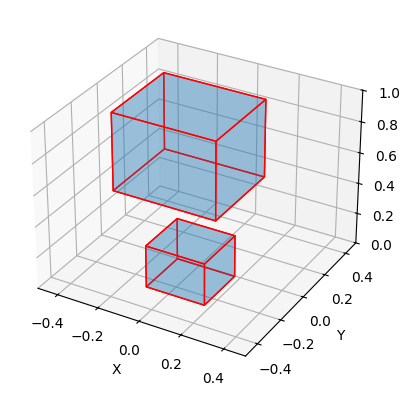

2
[<timor.task.Obstacle.Obstacle object at 0x7031bd675840>, <timor.task.Obstacle.Obstacle object at 0x7031c4dfc7c0>]
Cube data:  [{'size': {'x': 0.5, 'y': 0.4243639259950431, 'z': 0.5}, 'origin': {'x': -0.3516721565957564, 'y': -0.12601268986907804, 'z': 0.44179015826297224}}, {'size': {'x': 0.28129725339845424, 'y': 0.25658214112167077, 'z': 0.2681277735256115}, 'origin': {'x': -0.08775717522955478, 'y': -0.29699447963375736, 'z': 0.035748898672720845}}]


You can open the visualizer by visiting the following URL:
http://127.0.0.1:7012/static/


In [15]:
import datetime
import time
import sys
import os
import numpy as np
from timor.Geometry import Box, ComposedGeometry, Cylinder
from timor.task.Obstacle import Obstacle
from timor.task.Task import Task, TaskHeader
from timor.utilities.transformation import Transformation
from timor.utilities.spatial import rotX, rotY, rotZ

project_root = os.path.abspath(os.path.join(os.getcwd(), '../'))
sys.path.append(project_root)

from random_env_generation.random_env_generation import plot_random_cuboids, plot_random_cuboids_with_reachability, plot_reachability_interactive

cuboid_data_list = plot_random_cuboids(total_volume=0.03, space_size=(1.0, 1.0, 1.0), num_cuboids=2)

header = TaskHeader(
    ID='Random Obstacles Generation',
    tags=['Capstone', 'demo'],
    date=datetime.datetime(2024, 10, 28),
    author=['Jonas Li'],
    email=['liyunzhe.jonas@berkeley.edu'],
    affiliation=['UC Berkeley']
)

box = []
for idx, info in enumerate(cuboid_data_list):
    size, displacement = info["size"], info["origin"]
    box.append(Obstacle(ID=str(idx), 
                collision=Box(
                    dict(x=size['x'], y=size['y'], z=size['z']),  # Size
                    pose=Transformation.from_translation([displacement['x'] + size['x'] / 2, displacement['y'] + size['y'] / 2, displacement['z'] + size['z'] / 2])
                )))# Displacement
print(len(box))
print(box)
print("Cube data: ", cuboid_data_list)
task = Task(header, obstacles=[i for i in box])
task.visualize(robots=robot)

In [16]:
obstacle_reachability = Reachability(robot, task=task)
valid_poses = obstacle_reachability.reachability_random_sample(num_samples = 100000)
print("Valid poses:" , valid_poses)
reachable, manipulability =  zip(*valid_poses)
reachable = np.array([list(pt) for pt in reachable])
reachability_score = obstacle_reachability.find_reachibility_percentage(valid_pose=reachable)
print(reachability_score)

Valid poses: []


ValueError: not enough values to unpack (expected 2, got 0)

In [19]:
print(reachability_score)

99.8


In [38]:
print(task.obstacles)
print([obstacle.collision.enclosing_volume.limit_rectangular_cuboid for obstacle in task.obstacles])
points1 = [task.obstacles[0].collision.enclosing_volume.sample_uniform() for i in range(1000)]
points2 = [task.obstacles[1].collision.enclosing_volume.sample_uniform() for i in range(1000)]
print(points2)
points = [(0,0,0), (0,-0.2,0), (0.2,-0.4,0), (0,0.3,0.4), (-0.1,-0.3,0.8)]
plot_random_cuboids_with_reachability(cuboid_data_list)

[<timor.task.Obstacle.Obstacle object at 0x767270b97700>, <timor.task.Obstacle.Obstacle object at 0x767270b94730>]
[array([[-0.23954832,  0.23954832],
       [-0.17891934,  0.17891934],
       [-0.20243576,  0.20243576]]), array([[-0.25,  0.25],
       [-0.25,  0.25],
       [-0.25,  0.25]])]
[array([ 0.07590415, -0.00687259,  0.14771666]), array([ 0.0321955 ,  0.11240631, -0.12870619]), array([-0.23488902,  0.06032609,  0.07014132]), array([-0.00767519,  0.18402851, -0.12377043]), array([0.15296596, 0.17325711, 0.22442589]), array([-0.01908767, -0.24819656, -0.044589  ]), array([ 0.0574322 , -0.03413589,  0.22227033]), array([ 0.09195647, -0.13000756, -0.17520535]), array([-0.20749931,  0.11412346,  0.19202791]), array([0.15909332, 0.07914822, 0.17488425]), array([-0.17851697, -0.07076612,  0.24580946]), array([0.23816353, 0.24137777, 0.06138166]), array([-0.11394898, -0.10494307, -0.14704368]), array([ 0.03818471,  0.20543229, -0.07461772]), array([-0.01229151, -0.21303414,  0.226440

([], [])

In [46]:
def is_in_obstacle(cuboid_list, point):
    x, y, z = point
    for cuboid in cuboid_list:
        minx, miny, minz = cuboid["origin"]["x"], cuboid["origin"]["y"], cuboid["origin"]["z"]
        maxx, maxy, maxz = minx + cuboid["size"]["x"], miny + cuboid["size"]["y"], minz + cuboid["size"]["z"]

        if minx <= x <= maxx and miny <= y <= maxy and minz <= z <= maxz:
            return True

    return False 


In [47]:
print(is_in_obstacle(cuboid_data_list, (0,0,0)))
print(is_in_obstacle(cuboid_data_list, (0,-0.2,0)))
print(is_in_obstacle(cuboid_data_list, (0.2,-0.4,0)))
print(is_in_obstacle(cuboid_data_list, (0,0.3,0.4)))
print(is_in_obstacle(cuboid_data_list, (-0.1,-0.3,0.8)))


False
False
False
True
True
